<a href="https://colab.research.google.com/github/aaolcay/LMS-Adaptive-Filter/blob/main/PSK_encoder_matched_filter_decoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**PSK Modulation and Demodulation using Python**
In this tutorial, we will implement Phase Shift Keying (PSK) modulation and demodulation using Python. PSK is a digital modulation scheme that transmits digital information by changing the phase of the carrier wave. The binary information is represented by two phases of the carrier wave, 0 degrees and 180 degrees.

We will use numpy and matplotlib libraries for signal processing and visualization. Let's begin by importing these libraries:

In [55]:
import numpy as np
import matplotlib.pyplot as plt

####**Define the message signal**
We will start by defining a binary message signal consisting of 0's and 1's. The message signal is represented as an array of 0's and 1's:

In [56]:
message = np.array([0, 1, 0, 1, 1, 0, 1, 0])
N = 100*len(message)/2 # length of both message and carrier signals
num_repeats = N/len(message)

message_signal = []
for i in range(len(message)):
    x = np.repeat(message[i], num_repeats)
    message_signal.append(x) 

message_signal = np.hstack(message_signal)

####**Define the carrier signal**
We will define the carrier signal as a sine wave with a frequency of 32 kHz and a sampling rate of 192 kHz. We will also define the length of the carrier signal to be the same as the length of the message signal:

In [57]:
fs = 192*10**3 # Sampling rate 192 kHz 
fc = 32*10**3 # Carrier frequency 32 kHz
N = 100*len(message)/2 # Length of both message and carrier signals
t = np.arange(0, N)/fs # Definition of time
carrier = np.sin(2*np.pi*fc*t)

####**Modulate the message using PSK**
Next, we will modulate the message signal using PSK modulation. In PSK modulation, the binary information is represented by the phase of the carrier wave. In binary PSK, the two phases are 0 degrees and 180 degrees. We will represent the two phases using the complex numbers 1 and -1, respectively.

In [58]:
# Encode the message using PSK
M = 2 # Number of symbols
k = np.arange(M)
symbols = np.exp(1j*2*np.pi*k/M)

psk_signal = np.zeros(len(carrier), dtype=complex)
for i in range(len(message)):
    psk_signal[i*int(num_repeats):(i+1)*int(num_repeats)] = symbols[message[i]]

####**Add noise to the PSK signal**
We will add some Gaussian noise to the PSK signal to simulate the effects of noise in a real-world communication system:

In [59]:
noise = np.random.normal(0, 0.1, len(psk_signal))
noisy_signal = psk_signal + noise

####**Define the matched filter**
To demodulate the PSK signal, we will use a matched filter. A matched filter is a filter that maximizes the signal-to-noise ratio (SNR) of the received signal. The matched filter is a time-reversed and conjugated version of the transmitted signal. We will define the matched filter as the time-reversed version of the PSK signal:

In [60]:
matched_filter = np.flipud(psk_signal)

####**Demodulate the PSK signal**
We will convolve the noisy signal with the matched filter to get the filtered signal:

In [61]:
filtered_signal = np.convolve(noisy_signal, matched_filter, mode='same')

To decode the PSK signal, we will compare the average value of each symbol interval to a threshold value of 0.5. If the average value is less than 0.5, we will assign a value of 0 to the decoded signal. If the average value is greater than or equal to 0.5, we will assign a value of 1 to the decoded signal:

In [62]:
decoded_signal = np.zeros(len(message_signal))
for i in range(len(message)):
    
    if np.sum(filtered_signal[i*int(num_repeats):(i+1)*int(num_repeats)])/int(num_repeats) < 0.5:
        decoded_signal[i*int(num_repeats):(i+1)*int(num_repeats)] = np.zeros((1,int(num_repeats)))
    else:
        decoded_signal[i*int(num_repeats):(i+1)*int(num_repeats)] = np.ones((1,int(num_repeats)))

Plot each signal with respect to time: message signal, carrier signal, PSK encoded signal's real part, noisy signal, filtered signal's real part and decoded signal.

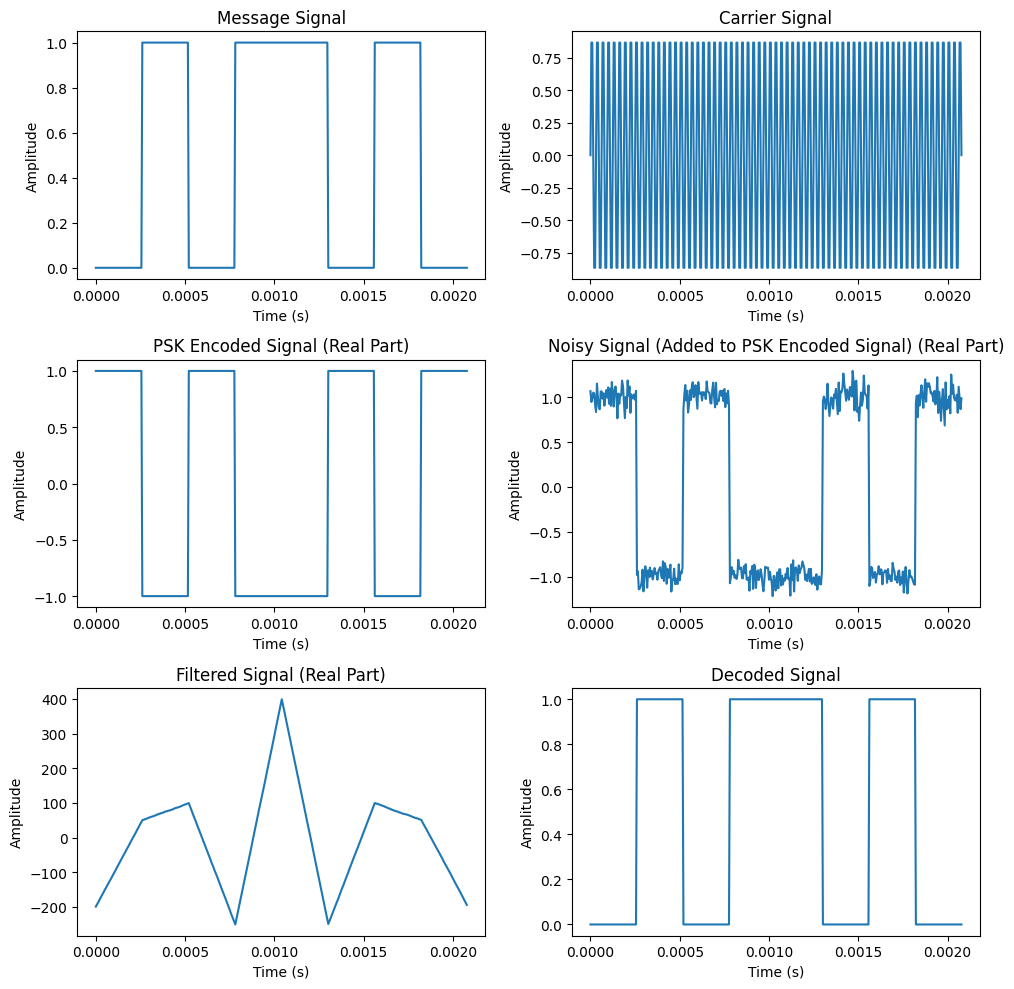

In [63]:
plt.figure(figsize=(10,10))

plt.subplot(321)
plt.plot(t, message_signal)
plt.title('Message Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(322)
plt.plot(t, carrier)
plt.title('Carrier Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(323)
plt.plot(t, psk_signal.real)
plt.title('PSK Encoded Signal (Real Part)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(324)
plt.plot(t, noisy_signal.real)
plt.title('Noisy Signal (Added to PSK Encoded Signal) (Real Part)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(325)
plt.plot(t, filtered_signal.real)
plt.title('Filtered Signal (Real Part)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(326)
plt.plot(t, decoded_signal)
plt.title('Decoded Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Print both original and decoded messages that are the same.

In [64]:
print('Original Message:', message_signal)
print('Decoded Message:', decoded_signal.astype(int))

Original Message: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Decoded Message: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 

**Please refer to me:**

Abdullah A. Olcay (University of Southampton)

olcayazzam@gmail.com

[Linkedin](https://www.linkedin.com/in/abdullah-azzam-olcay-613453183/)
